In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


In [2]:
# Ιδιο Training με το πρώτο μέρος
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and test sets (50%-50% ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [3]:
# Function to train k-NN classifier and calculate error
def train_and_evaluate_knn(k, X_train, X_test, y_train, y_test):
    
    
    # Initialize the KNeighborsClassifier with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
     # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
     # Predict labels for the test set
    y_pred = knn.predict(X_test)
    
     # Calculate and return the classification error
    error = 1 - accuracy_score(y_test, y_pred)
    return knn, error

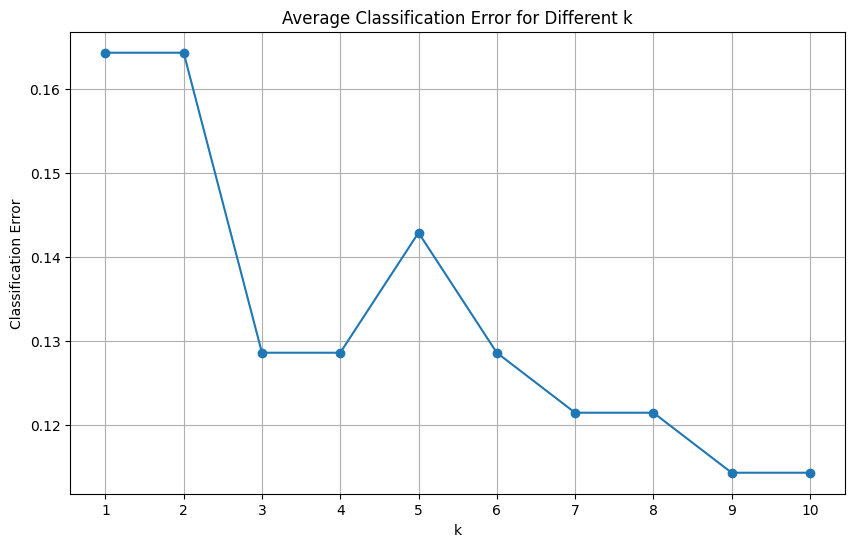

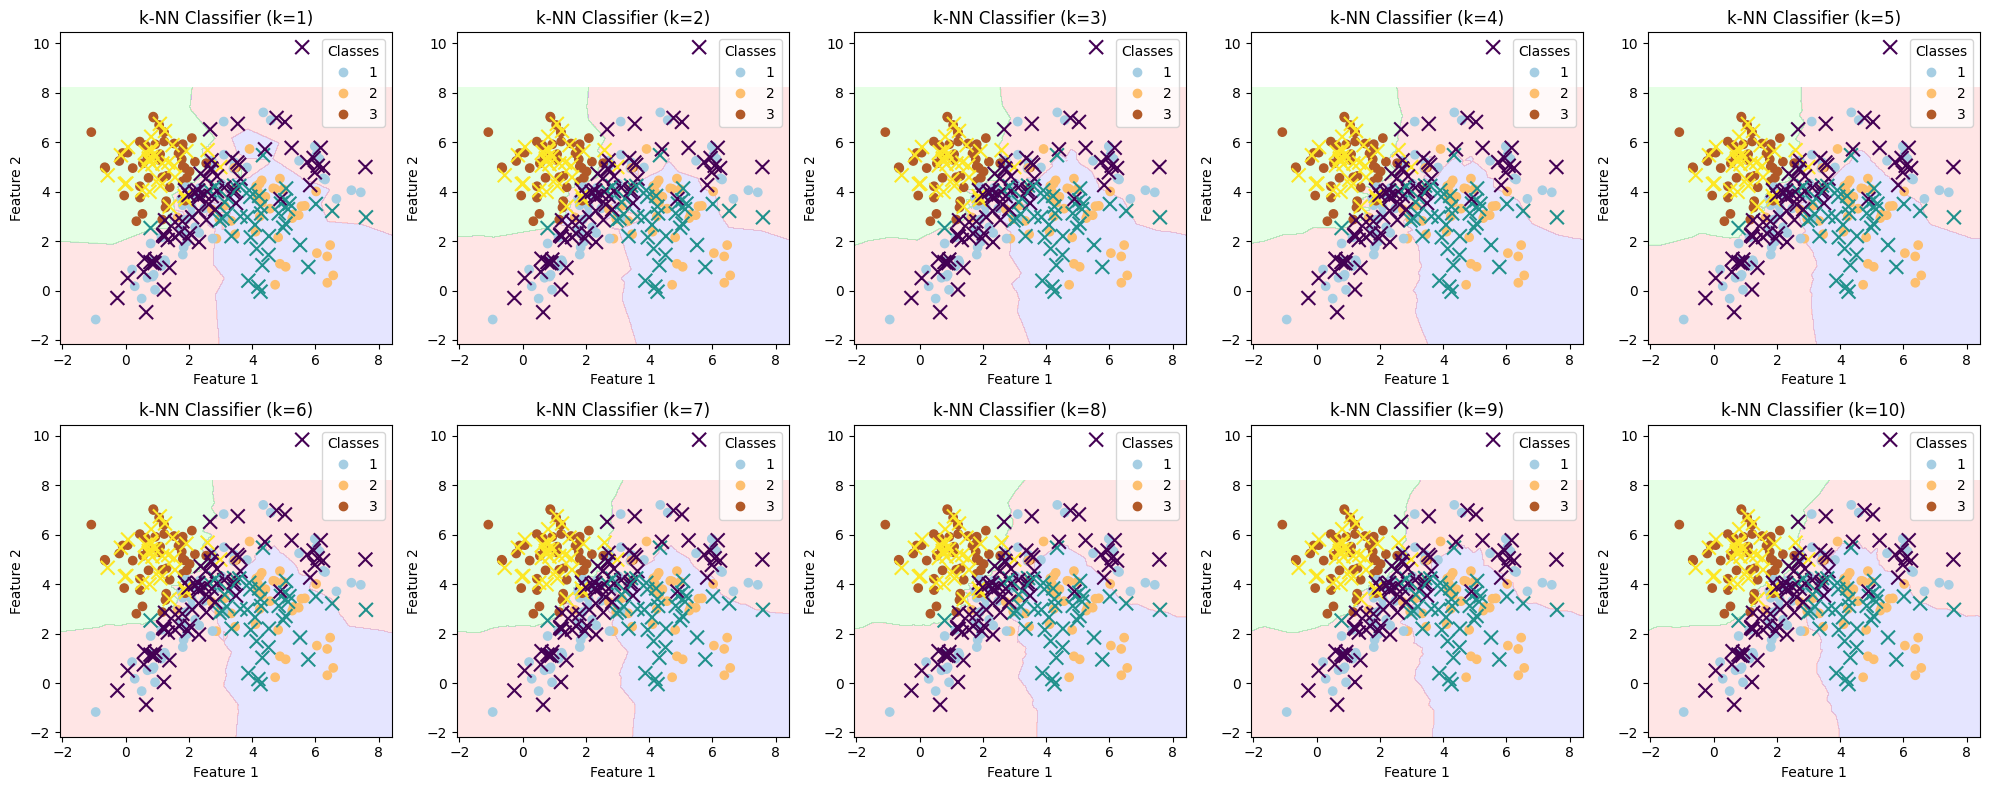

In [4]:
# Initialize lists to store classification errors for each k
classification_errors = []

# Meshgrid for plotting decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Function to plot decision boundaries for a given k
def plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, ax):
    # Train the k-NN classifier for plotting
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Plot decision boundaries
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Plot data points
    scatter = ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,  cmap=plt.cm.Paired)
    ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, marker='x', s=100)

    ax.set_title(f'k-NN Classifier (k={k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(*scatter.legend_elements(), title='Classes')

# Train k-NN classifier for k = 1 to 10 and calculate errors
errors = []
for k in range(1, 11):
    knn, error = train_and_evaluate_knn(k, X_train, X_test, y_train, y_test)
    errors.append(error)

# Plotting the errors for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), errors, marker='o')
plt.title('Average Classification Error for Different k')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# Plot decision boundaries for the entire range of k values
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()
for i, k in enumerate(range(1, 11)):
    plot_decision_boundaries_knn(X_train, y_train, X_test, y_test, k, axs[i])
plt.tight_layout()
plt.show()
